# Predicting UFC Fights With Supervised Learning
Adam Pfister - Oregon, USA - November 7, 2019  

This project focuses on UFC fight prediction using supervised learning models. The data comes from Kaggle (https://www.kaggle.com/rajeevw/ufcdata). A big thank you to the originator of this data, Rajeev Warrier. It is detailed and well put-together with zero missing data.  

Below in quotes is info about the dataset directly from its Kaggle page:  
 
" This is a list of every UFC fight in the history of the organisation. Every row contains information about both fighters, fight details and the winner. The data was scraped from ufcstats website. After fightmetric ceased to exist, this came into picture. I saw that there was a lot of information on the website about every fight and every event and there were no existing ways of capturing all this. I used beautifulsoup to scrape the data and pandas to process it. It was a long and arduous process, please forgive any mistakes. I have provided the raw files incase anybody wants to process it differently. This is my first time creating a dataset, any suggestions and corrections are welcome! Incase anyone wants to check out the work, I have all uploaded all the code files, including the scraping module here.  

Each row is a compilation of both fighter stats. Fighters are represented by 'red' and 'blue' (for red and blue corner). So for instance, red fighter has the complied average stats of all the fights except the current one. The stats include damage done by the red fighter on the opponent and the damage done by the opponent on the fighter (represented by 'opp' in the columns) in all the fights this particular red fighter has had, except this one as it has not occured yet (in the data). Same information exists for blue fighter. The target variable is 'Winner' which is the only column that tells you what happened. Here are some column definitions. "  

Here I will only list variables I am particularly interested in or have created myself. However, the original preprocessed dataset contains 160 variables, and the original raw dataset contains 145 variables. Many of the variables overlap, but there are plenty to mix and match. 

### Key Variables    
- __Winner:__ winner of fight (red or blue corner)
- __Red win:__ binary, 1 for red win, 0 for red loss
- __Physical advantage score:__ interaction between height and reach difference
- __Experience score:__ interaction between total fights and total rounds fought
- __Streak score:__ interaction between current and longest win streak
- __Win %:__ total wins divided by total fights
- __Finish %:__ percentage of fights that end in TKO/KO, submission, or doctor's stoppage
- __Decision %:__ percentage of fights that end in judge's decision
- __Offense score:__ interaction between % significant strikes landed, submission attempts, takedowns landed, and knowckdowns
- __Defense score:__ interaction between % significant strikes absorbed, submission attempts against, and opponent takedowns landed  

### Overview  
1. __Explore Original Datasets__  
    > 1. Size and shape
    > 2. Sample view
    > 3. List columns
    > 4. Missing data  
2. __Create New Variables and Clean Data__  
    > 1. Combine and create new variables
    > 2. Parse date/time
    > 3. Create dummy binary columns for 'Winner' category
    > 4. (optional) Trim dataset to include only 2011-2019 and four men's weight classes: featherweight, lightweight, welterweight, middleweight 
    > 5. Create subset dataframe of key variables  
3. __Exploratory Data Analysis__  
    > 1. Basic statistics
    > 2. Bar plot  
        - wins (red vs blue)
    > 3. Count plot  
        - weight classes
    > 4. Distribution plots  
        - wins (red vs blue)  
        - age (red vs blue)  
        - experience (red vs blue)
    > 5. Pair plots  
        - physical advantage and experience (red vs blue) compared to red wins  
        - offense and defense (red vs blue) compared to red wins  
        - win % and finish % (red vs blue) compared to red wins  
    > 6. Correlation matrix  
4. __Supervised Learning__  
    > 1. Define and preprocess data
    > 2. Support vector machine
    > 3. Naive Bayes
    > 4. Logistic regression
    > 5. Decision tree/random forest  
5. __Summary and Conclusion__
6. __Acknowledgments__

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
df_clean = pd.read_csv(r'C:\Users\AP\Desktop\ufc-fight-stats-clean.csv')
df_raw = pd.read_csv(r'C:\Users\AP\Desktop\ufc-fight-stats.csv')

# change all columns to lower case
df_clean.columns = map(str.lower, df_clean.columns)
df_raw.columns = map(str.lower, df_raw.columns)

------------------

### Explore Original Datasets

#### Pre-processed Dataset  

1. Size and shape
2. Sample view
3. List columns
4. Missing data

In [3]:
# basic size and shape of preprocessed dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Columns: 160 entries, winner to r_stance_switch
dtypes: bool(1), float64(102), int64(56), object(1)
memory usage: 4.3+ MB


#### Observations
- The dataset contains 160 columns and roughly 3600 rows.

In [4]:
# sample view of dataset
df_clean.head()

,winner,title_bout,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_body_att,b_avg_body_landed,b_avg_clinch_att,b_avg_clinch_landed,...,weight_class_women's strawweight,b_stance_open stance,b_stance_orthodox,b_stance_sideways,b_stance_southpaw,b_stance_switch,r_stance_open stance,r_stance_orthodox,r_stance_southpaw,r_stance_switch
0,Red,True,5,0,4,0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0,3,0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,False,3,0,3,0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,Blue,False,3,0,4,0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,Blue,False,3,0,1,0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


In [5]:
# list all variables
list(df_clean.columns)

['winner',
 'title_bout',
 'no_of_rounds',
 'b_current_lose_streak',
 'b_current_win_streak',
 'b_draw',
 'b_avg_body_att',
 'b_avg_body_landed',
 'b_avg_clinch_att',
 'b_avg_clinch_landed',
 'b_avg_distance_att',
 'b_avg_distance_landed',
 'b_avg_ground_att',
 'b_avg_ground_landed',
 'b_avg_head_att',
 'b_avg_head_landed',
 'b_avg_kd',
 'b_avg_leg_att',
 'b_avg_leg_landed',
 'b_avg_pass',
 'b_avg_rev',
 'b_avg_sig_str_att',
 'b_avg_sig_str_landed',
 'b_avg_sig_str_pct',
 'b_avg_sub_att',
 'b_avg_td_att',
 'b_avg_td_landed',
 'b_avg_td_pct',
 'b_avg_total_str_att',
 'b_avg_total_str_landed',
 'b_longest_win_streak',
 'b_losses',
 'b_avg_opp_body_att',
 'b_avg_opp_body_landed',
 'b_avg_opp_clinch_att',
 'b_avg_opp_clinch_landed',
 'b_avg_opp_distance_att',
 'b_avg_opp_distance_landed',
 'b_avg_opp_ground_att',
 'b_avg_opp_ground_landed',
 'b_avg_opp_head_att',
 'b_avg_opp_head_landed',
 'b_avg_opp_kd',
 'b_avg_opp_leg_att',
 'b_avg_opp_leg_landed',
 'b_avg_opp_pass',
 'b_avg_opp_rev',
 

In [6]:
# quantify missing data
total_missing = df_clean.isnull().sum().sort_values(ascending=False)
percent_missing = (df_clean.isnull().sum()/df_clean.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Count', 'Percent'])

missing_data.head()

,Count,Percent
r_stance_switch,0,0.0
r_stance_southpaw,0,0.0
b_total_time_fought(seconds),0,0.0
b_total_rounds_fought,0,0.0
b_avg_opp_total_str_landed,0,0.0


#### Raw Dataset   

1. Size and shape
2. Sample view
3. List columns
4. Missing data

In [7]:
# basic size and shape of dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, r_fighter to r_age
dtypes: bool(1), float64(106), int64(29), object(9)
memory usage: 5.5+ MB


#### Observations
- The raw dataset has 145 columns and 5100 rows.

In [8]:
# sample view of dataset
df_raw.head()

,r_fighter,b_fighter,referee,date,location,winner,title_bout,weight_class,no_of_rounds,b_current_lose_streak,...,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,6/8/2019,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0,...,2,0,0,8,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,6/8/2019,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0,...,0,2,0,5,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,6/8/2019,"Chicago, Illinois, USA",Red,False,Lightweight,3,0,...,3,6,1,14,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,6/8/2019,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0,...,1,0,0,6,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,6/8/2019,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0,...,2,0,0,3,Southpaw,187.96,190.50,264.0,32.0,26.0


In [9]:
# list all columns
list(df_raw.columns)

['r_fighter',
 'b_fighter',
 'referee',
 'date',
 'location',
 'winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'b_current_lose_streak',
 'b_current_win_streak',
 'b_draw',
 'b_avg_body_att',
 'b_avg_body_landed',
 'b_avg_clinch_att',
 'b_avg_clinch_landed',
 'b_avg_distance_att',
 'b_avg_distance_landed',
 'b_avg_ground_att',
 'b_avg_ground_landed',
 'b_avg_head_att',
 'b_avg_head_landed',
 'b_avg_kd',
 'b_avg_leg_att',
 'b_avg_leg_landed',
 'b_avg_pass',
 'b_avg_rev',
 'b_avg_sig_str_att',
 'b_avg_sig_str_landed',
 'b_avg_sig_str_pct',
 'b_avg_sub_att',
 'b_avg_td_att',
 'b_avg_td_landed',
 'b_avg_td_pct',
 'b_avg_total_str_att',
 'b_avg_total_str_landed',
 'b_longest_win_streak',
 'b_losses',
 'b_avg_opp_body_att',
 'b_avg_opp_body_landed',
 'b_avg_opp_clinch_att',
 'b_avg_opp_clinch_landed',
 'b_avg_opp_distance_att',
 'b_avg_opp_distance_landed',
 'b_avg_opp_ground_att',
 'b_avg_opp_ground_landed',
 'b_avg_opp_head_att',
 'b_avg_opp_head_landed',
 'b_avg_opp_kd',
 'b_av

In [10]:
# quantify missing data
total_missing = df_raw.isnull().sum().sort_values(ascending=True)
percent_missing = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=True)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Count', 'Percent'])

missing_data.head()

,Count,Percent
r_fighter,0,0.0
r_total_title_bouts,0,0.0
r_total_rounds_fought,0,0.0
r_losses,0,0.0
r_longest_win_streak,0,0.0


#### Observations
- There is much overlap between the two datasets. The raw set contains some variables not found in the clean version. This includes each fighter's name, who refereed, and the date and location of the fight. The clean version drops these variables and adds some more detailed fight metrics.  
  
- We need to combine some categories from each dataset. First, we will parse the date/time column in the raw file and add it to the preprocessed set.  

- No missing data! Thank you to the originator of this data, Rajeev Warrier.  

- Let's clean the data and create/combine new variables based on my intuitions from years of training and watching mixed martial arts. 

--------------------

# Create New Variables and Clean Data  

1. Combine and create new variables
2. Parse date/time
3. Create dummy binary columns for 'Winner' category
4. Trim dataset to include only 2011-2019 and four weight classes: featherweight, lightweight, welterweight, middleweight
5. Create subset dataframe of key variables

In [11]:
# create new variables
# r = red corner
# b = blue corner
'''
# reach advantage
df_clean['r_reach_adv'] = df_clean.r_reach_cms - df_clean.b_reach_cms
df_clean['r_reach_adv'] = df_clean.r_reach_cms - df_clean.b_reach_cms
df_clean['b_reach_adv'] = df_clean.b_reach_cms - df_clean.r_reach_cms


# height advantage
df_clean['r_height_adv'] = df_clean.r_height_cms - df_clean.b_height_cms
df_clean['b_height_adv'] = df_clean.b_height_cms - df_clean.r_height_cms

# age difference
df_clean['age_diff'] = df_clean.r_age - df_clean.b_age

# overall physical advantage score (average of reach and height)
df_clean['r_phys_adv'] = df_clean.r_reach_adv * df_clean.r_height_adv
df_clean['b_phys_adv'] = df_clean.b_reach_adv * df_clean.b_height_adv
'''

# win %
df_clean['r_win_pct'] = df_clean.r_wins  / (df_clean.r_wins + df_clean.r_losses + df_clean.r_draw)
df_clean['b_win_pct'] = df_clean.b_wins / (df_clean.b_wins + df_clean.b_losses + df_clean.b_draw) 

# total fights
df_clean['r_total_fights'] = df_clean.r_wins + df_clean.r_losses + df_clean.r_draw
df_clean['b_total_fights'] = df_clean.b_wins + df_clean.b_losses + df_clean.b_draw 

# % fights finished by ko/tko, submission, or doctor stoppage
df_clean['r_finish_pct'] = (df_clean['r_win_by_ko/tko'] + df_clean.r_win_by_submission +
                            df_clean.r_win_by_tko_doctor_stoppage) / df_clean.r_total_fights
df_clean['b_finish_pct'] = (df_clean['b_win_by_ko/tko'] + df_clean.b_win_by_submission +
                            df_clean.b_win_by_tko_doctor_stoppage) / df_clean.b_total_fights

# % fights ended in decision
df_clean['r_decision_pct'] = (df_clean.r_win_by_decision_majority + df_clean.r_win_by_decision_split +
                              df_clean.r_win_by_decision_unanimous) / df_clean.r_total_fights
df_clean['b_decision_pct'] = (df_clean.b_win_by_decision_majority + df_clean.b_win_by_decision_split +
                              df_clean.b_win_by_decision_unanimous) / df_clean.b_total_fights

# % total strikes landed 
df_clean['r_total_str_pct'] = df_clean.r_avg_total_str_landed / df_clean.r_avg_total_str_att
df_clean['b_total_str_pct'] = df_clean.b_avg_total_str_landed / df_clean.b_avg_total_str_att

# average % total strikes absorbed
df_clean['r_opp_total_str_pct'] = df_clean.r_avg_opp_total_str_landed / df_clean.r_avg_opp_total_str_att
df_clean['b_opp_total_str_pct'] = df_clean.b_avg_opp_total_str_landed / df_clean.b_avg_opp_total_str_att

# overall streak score
# interaction between current and longest win streak
df_clean['r_streak'] = df_clean.r_current_win_streak * df_clean.r_longest_win_streak
df_clean['b_streak'] = df_clean.b_current_win_streak * df_clean.b_longest_win_streak

# overall offense score
# interaction between significant strikes landed,
# average knowckdowns, submission attempts, average takedowns landed
df_clean['r_offense'] = df_clean.r_avg_sig_str_pct * df_clean.r_avg_kd * df_clean.r_avg_sub_att * df_clean.r_avg_td_pct
df_clean['b_offense'] = df_clean.b_avg_sig_str_pct * df_clean.r_avg_kd * df_clean.b_avg_sub_att * df_clean.b_avg_td_pct

# overall defense score
# interaction between % significant strikes absorbed, 
# average submission attempts against, and % opponent takedown landed
df_clean['r_defense'] = df_clean.r_avg_opp_sig_str_pct * df_clean.r_avg_opp_sub_att * df_clean.r_avg_opp_td_pct
df_clean['b_defense'] = df_clean.b_avg_opp_sig_str_pct * df_clean.b_avg_opp_sub_att * df_clean.b_avg_opp_td_pct

# overall experience score
# interaction between total fights and total rounds fought
df_clean['r_experience'] = df_clean.r_total_fights * df_clean.r_total_rounds_fought
df_clean['b_experience'] = df_clean.b_total_fights * df_clean.b_total_rounds_fought

In [12]:
# parse date/time into separate columns
df_clean['date'] = pd.to_datetime(df_raw['date'])

df_clean['day'] = df_clean.date.dt.day
df_clean['month'] = df_clean.date.dt.month
df_clean['year'] = df_clean.date.dt.year

In [13]:
# create binary winner columns 
df_dum_win = pd.concat([df_clean, pd.get_dummies(df_clean['winner'], prefix='win', dummy_na=True)], axis=1)

# combine dummy columns to raw dataset
df_clean = pd.concat([df_dum_win, df_raw], axis=1)

# convert columns to lowercase
df_clean.columns = map(str.lower, df_clean.columns)

In [14]:
# drop duplicate columns
df_clean = df_clean.loc[:,~df_clean.columns.duplicated()]

# drop nulls
df_clean.dropna(axis=0, inplace=True)

# convert weight column from string to integer
#df_clean.r_weight_lbs = df_clean.r_weight_lbs.astype(int)
#df_clean.b_weight_lbs = df_clean.b_weight_lbs.astype(int)

# drop outliers above three standard deviations
#df_clean = df_clean.drop(columns=('year', 'day', 'month')[(np.abs(stats.zscore(df_clean)) < 3).all(axis=1)]
#boston_df_o = boston_df_o[(z < 3).all(axis=1)]
df_clean = df_clean[(df_clean.r_weight_lbs > 114) & (df_clean.r_weight_lbs < 266)]
df_clean = df_clean[(df_clean.b_weight_lbs > 114) & (df_clean.b_weight_lbs < 266)]

# OPTIONAL
# drop all rows before 2011 for lack of detailed stats
df_clean = df_clean[(df_clean['year'] > 2011) & (df_clean['year'] < 2020)]

# OPTIONAL
#drop all weight classes except featherweight(145 lb), lightweight(155 lb),
# welterweight(170 lb), and middleweight(185 lb)
#df_clean = df_clean.loc[df_clean.weight_class.isin(['Featherweight', 'Lightweight', 'Welterweight', 'Middleweight'])]

In [15]:
# create new dataframe of key variables and rearrange by similarity groups

df_keys = df_clean[['winner',
                    'win_red',
                    #'r_phys_adv',
                    'r_experience',  
                    'r_streak',
                    'r_win_pct',
                    'r_finish_pct',
                    'r_decision_pct',
                    'r_offense',
                    'r_defense',
                    #'b_phys_adv',
                    'b_experience',
                    'b_streak',
                    'b_win_pct',
                    'b_finish_pct',
                    'b_decision_pct',
                    'b_offense',
                    'b_defense',
                    ]]

In [16]:
# basic size and shape of newly created clean dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3106 entries, 0 to 3343
Columns: 194 entries, winner to r_stance
dtypes: datetime64[ns](1), float64(184), object(9)
memory usage: 4.5+ MB


#### Observations
- The new clean dataset has 200 columns and 3100 rows

In [17]:
# sample view of newly created clean dataframe 
df_clean.head()

,winner,title_bout,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_body_att,b_avg_body_landed,b_avg_clinch_att,b_avg_clinch_landed,...,win_blue,win_red,win_nan,r_fighter,b_fighter,referee,location,weight_class,b_stance,r_stance
0,Red,True,5.0,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0.0,1.0,0.0,Henry Cejudo,Marlon Moraes,Marc Goddard,"Chicago, Illinois, USA",Bantamweight,Orthodox,Orthodox
1,Red,True,5.0,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0.0,1.0,0.0,Valentina Shevchenko,Jessica Eye,Robert Madrigal,"Chicago, Illinois, USA",Women's Flyweight,Orthodox,Southpaw
2,Red,False,3.0,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0.0,1.0,0.0,Tony Ferguson,Donald Cerrone,Dan Miragliotta,"Chicago, Illinois, USA",Lightweight,Orthodox,Orthodox
3,Blue,False,3.0,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,1.0,0.0,0.0,Jimmie Rivera,Petr Yan,Kevin MacDonald,"Chicago, Illinois, USA",Bantamweight,Switch,Orthodox
4,Blue,False,3.0,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,1.0,0.0,0.0,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,"Chicago, Illinois, USA",Heavyweight,Southpaw,Southpaw


In [18]:
# sample view of newly created subset of key variables 
df_keys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3106 entries, 0 to 3343
Data columns (total 16 columns):
winner            3106 non-null object
win_red           3106 non-null float64
r_experience      3106 non-null float64
r_streak          3106 non-null float64
r_win_pct         3106 non-null float64
r_finish_pct      3106 non-null float64
r_decision_pct    3106 non-null float64
r_offense         3106 non-null float64
r_defense         3106 non-null float64
b_experience      3106 non-null float64
b_streak          3106 non-null float64
b_win_pct         3106 non-null float64
b_finish_pct      3106 non-null float64
b_decision_pct    3106 non-null float64
b_offense         3106 non-null float64
b_defense         3106 non-null float64
dtypes: float64(15), object(1)
memory usage: 400.4+ KB


#### Observations
- The dataset of key variables for modeling has 16 columns and 3300 rows
- All feature variables are continuous floats, and the target variable winner is a binary category

In [19]:
# sample view of newly created subset of key variables
df_keys.head()

,winner,win_red,r_experience,r_streak,r_win_pct,r_finish_pct,r_decision_pct,r_offense,r_defense,b_experience,b_streak,b_win_pct,b_finish_pct,b_decision_pct,b_offense,b_defense
0,Red,1.0,270.0,16.0,0.800000,0.200000,0.600000,0.008537,0.000000,45.0,16.0,0.800000,0.600000,0.200000,0.007456,0.000000
1,Red,1.0,175.0,4.0,0.714286,0.285714,0.428571,0.000000,0.018378,290.0,9.0,0.400000,0.100000,0.300000,0.000000,0.065974
2,Red,1.0,495.0,121.0,0.933333,0.666667,0.266667,0.023851,0.002977,2108.0,24.0,0.741935,0.516129,0.225806,0.010404,0.002787
3,Blue,0.0,160.0,0.0,0.750000,0.125000,0.625000,0.000000,0.000000,36.0,16.0,1.000000,0.500000,0.500000,0.014824,0.000000
4,Blue,0.0,28.0,0.0,0.750000,0.500000,0.250000,0.000000,0.000000,16.0,1.0,0.500000,0.000000,0.500000,0.000000,0.000000


-----------------------

# Exploratory Data Analysis  

1. Basic stats
2. Bar plot  
    > - wins (red vs blue)
3. Count plot  
    > - weight classes
4. Distribution plots  
    > - wins (red vs blue)
    > - age (red vs blue)
    > - experience (red vs blue)
5. Pair plots  
    > - physical advantage and experience (red vs blue) compared to red wins  
    > - offense and defense (red vs blue) compared to red wins  
    > - win % and finish % (red vs blue) compared to red wins  
6. Correlation matrix

In [20]:
# basic statistics
df_keys.describe()

,win_red,r_experience,r_streak,r_win_pct,r_finish_pct,r_decision_pct,r_offense,r_defense,b_experience,b_streak,b_win_pct,b_finish_pct,b_decision_pct,b_offense,b_defense
count,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000
mean,0.637798,191.330006,5.017386,0.633488,0.358994,0.273532,0.020224,0.064160,124.481648,3.631359,0.588937,0.331423,0.256441,0.026340,0.074121
std,0.480714,298.705674,14.308214,0.257919,0.265983,0.252165,0.095915,0.160487,239.933781,7.455912,0.306311,0.290823,0.270844,0.095411,0.199823
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,0.000000,0.500000,0.166667,0.000000,0.000000,0.000000,8.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.000000,1.000000,0.666667,0.333333,0.250000,0.000000,0.017844,32.500000,1.000000,0.625000,0.333333,0.200000,0.000000,0.011575
75%,1.000000,234.000000,4.000000,0.777778,0.500000,0.428571,0.019068,0.069076,124.500000,4.000000,0.800000,0.500000,0.400000,0.018839,0.070572
max,1.000000,2204.000000,256.000000,1.000000,1.000000,1.000000,4.288000,4.640000,2108.000000,144.000000,1.000000,1.000000,1.000000,2.320000,3.748500


#### Observations 
- Except for the experience and streak variables, all standard deviations are small. We will check for outliers in these two categories later on.
- All of the variables besides experience seem to contain zeros as their minimum. This makes sense for some variables, for example, even a former champion can have a zero streak score if coming off of a loss. However, it does not make sense that a zero win % be very common. Here again, outliers should be investigated.

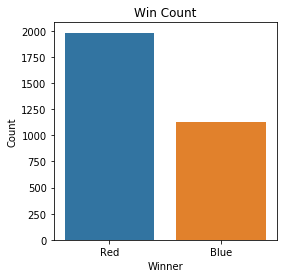

Total Win Count

Red     1981
Blue    1125
Name: winner, dtype: int64


Win %

Red     0.637798
Blue    0.362202
Name: winner, dtype: float64


In [21]:
# bar chart red vs blue total wins and win %
plt.figure(figsize=(4,4))
sns.countplot(df_clean.winner)
plt.title('Win Count')
plt.xlabel('Winner')
plt.ylabel('Count')

plt.show()

# total win count
count = df_clean.winner.value_counts()
print('Total Win Count')
print('')
print(count)
print('')
print('')

# win %
print('Win %')
print('')
print(count / (count[0] + count[1]))

#### Observations  

- Out of 3100 total fights, the red corner has won 2000 of them, or 64%.
- The red corner is historically reserved for the favored, more experienced of the two fighters, so this makes sense.
- The above chart is simple but important. Remember our goal is to predict the outcome of a fight. Also remember that the red corner is typically the favored, more experienced fighter. This means that if your only strategy for predicting fights was always betting red, you would be correct 64% of the time. Not bad. This is now our baseline score to beat. If we can use machine learning to score better than 64% accuracy, it could be considered a success. Anything below 64% and the models are worthless because we could always fall back on betting red every time. 

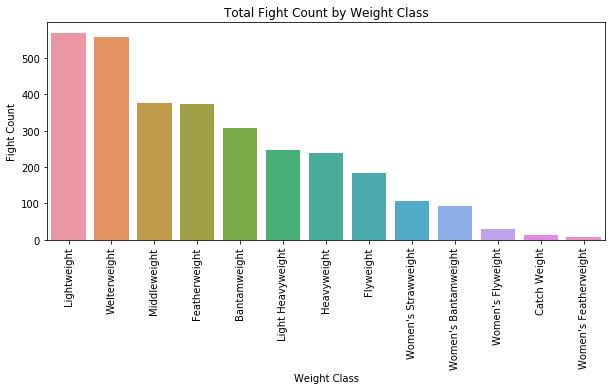

Lightweight              570
Welterweight             558
Middleweight             376
Featherweight            373
Bantamweight             307
Light Heavyweight        246
Heavyweight              239
Flyweight                184
Women's Strawweight      107
Women's Bantamweight      93
Women's Flyweight         31
Catch Weight              14
Women's Featherweight      8
Name: weight_class, dtype: int64


In [23]:
# countplot of weight classes
plt.figure(figsize=(10,4))
sns.countplot(df_clean.weight_class, order=df_clean.weight_class.value_counts().index)
plt.title('Total Fight Count by Weight Class')
plt.xlabel('Weight Class')
plt.xticks(rotation='vertical')
plt.ylabel('Fight Count')

plt.show()

# print totals
print(df_clean.weight_class.value_counts())

#### Observations  
- Lightweight(155 lbs) and welterweight(170 lbs) are the most common weight classes and are almost equal in count at around 560 each out of 3100 total fights. Fights in these two weight classes occur 36% of the time.
- Featherweight(145) and middleweight(185) are the next two runnerups and also almost equal each other in count at 375 fights each out of 3100 total fights. Fights in these two weight classes occur 24% of the time.
- Fights occuring in the featherweight, lightweight, welterweight, and middleweight divisions account for roughly 60% of all fights.

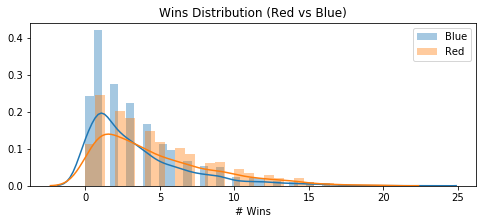

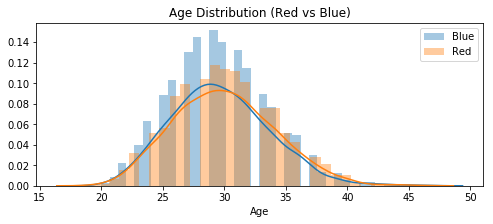

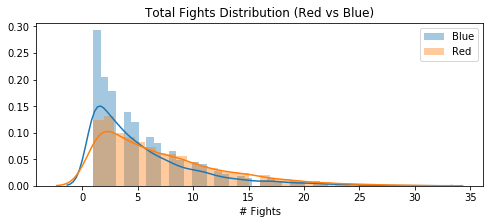

Mean Fighter Age

Red:  30.01738570508693
Blue:  29.67031551835158


In [25]:
# distributions comparison

# wins distribution
fig, ax = plt.subplots(1, figsize=(8, 3))
sns.distplot(df_clean.b_wins)
sns.distplot(df_clean.r_wins)
plt.title('Wins Distribution (Red vs Blue)')
plt.xlabel('# Wins')
plt.legend(labels=['Blue','Red'], loc="upper right")

# age distribution
fig, ax = plt.subplots(1, figsize=(8, 3))
sns.distplot(df_clean.b_age)
sns.distplot(df_clean.r_age)
plt.title('Age Distribution (Red vs Blue)')
plt.xlabel('Age')
plt.legend(labels=['Blue','Red'], loc="upper right")

# total fights distribution
fig, ax = plt.subplots(1, figsize=(8, 3))
sns.distplot(df_clean.b_total_fights)
sns.distplot(df_clean.r_total_fights)
plt.title('Total Fights Distribution (Red vs Blue)')
plt.xlabel('# Fights')
plt.legend(labels=['Blue','Red'], loc="upper right")

plt.show()

# calculate red and blue mean and mode ages
r_mean_age = df_clean.r_age.mean()
r_mode_age = df_clean.r_age.mode()
b_mean_age = df_clean.b_age.mean()
b_mode_age = df_clean.b_age.mode()

# print red and blue mean ages
print('Mean Fighter Age')
print('')
print('Red: ', (r_mean_age))
print('Blue: ', (b_mean_age))

#### Observations  
- The red and blue corner distributions have similar shapes to each other in their respective graphs.
- There are more blue fighters with < 5 wins than red fighters, and there are more red fighters with > 5 wins than blue fighters. This makes sense, as historically the red corner has been reserved for the favored, more experienced fighter.
- The mean age of red and blue are essentially equal at 30 years old. This is surprising. I would have expected the red corner to have a slightly higher mean age since the red corner is typically reserved for the favored, more experienced fighter.  

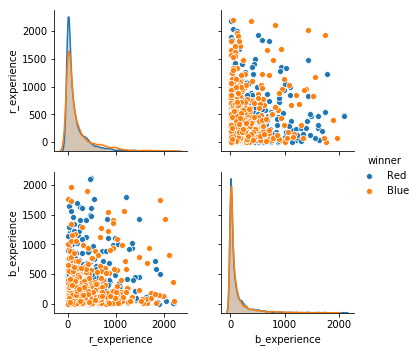

In [26]:
# pairplot red vs blue physical advantage and experience compared to red wins
sns.pairplot(df_keys[['winner',
                      #'r_phys_adv',
                      #'b_phys_adv',
                      'r_experience',
                      'b_experience',
                      ]], hue='winner')

plt.show()

#### Observations  


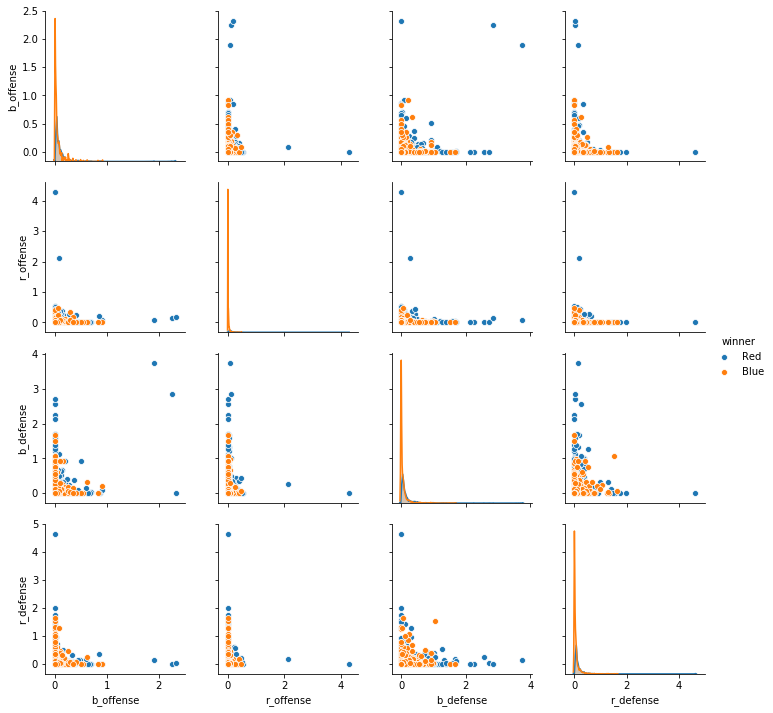

In [27]:
# pairplot red vs blue offense and defense compared to red wins
sns.pairplot(df_keys[['winner',
                      'b_offense',
                      'r_offense',
                      'b_defense',
                      'r_defense',
                      ]], hue='winner')

plt.show()

#### Observations  


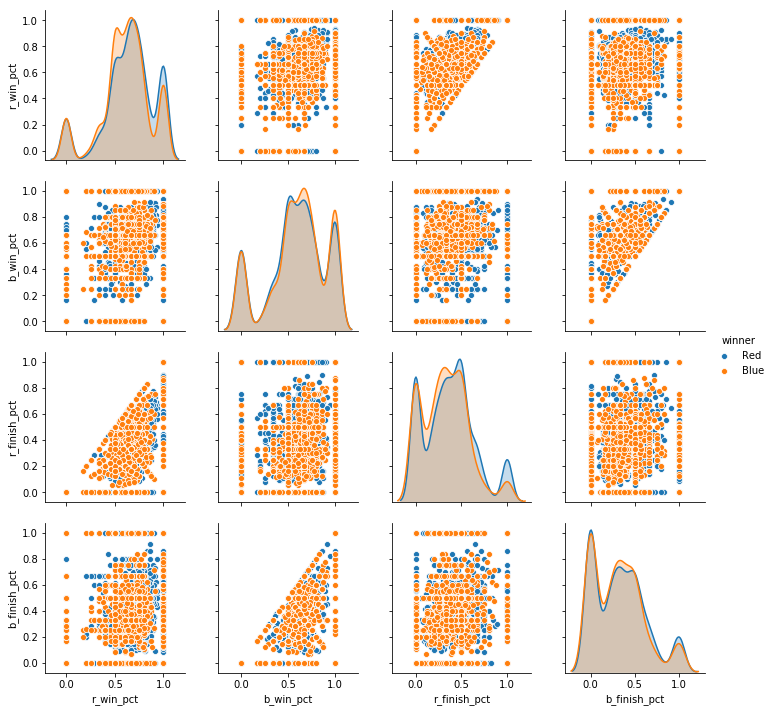

In [28]:
# pairplot red vs blue win % and finish % compared to red wins
sns.pairplot(df_keys[['winner',
                      'r_win_pct',
                      'b_win_pct',
                      'r_finish_pct',
                      'b_finish_pct',
                      ]], hue='winner')

plt.show()

#### Observations  


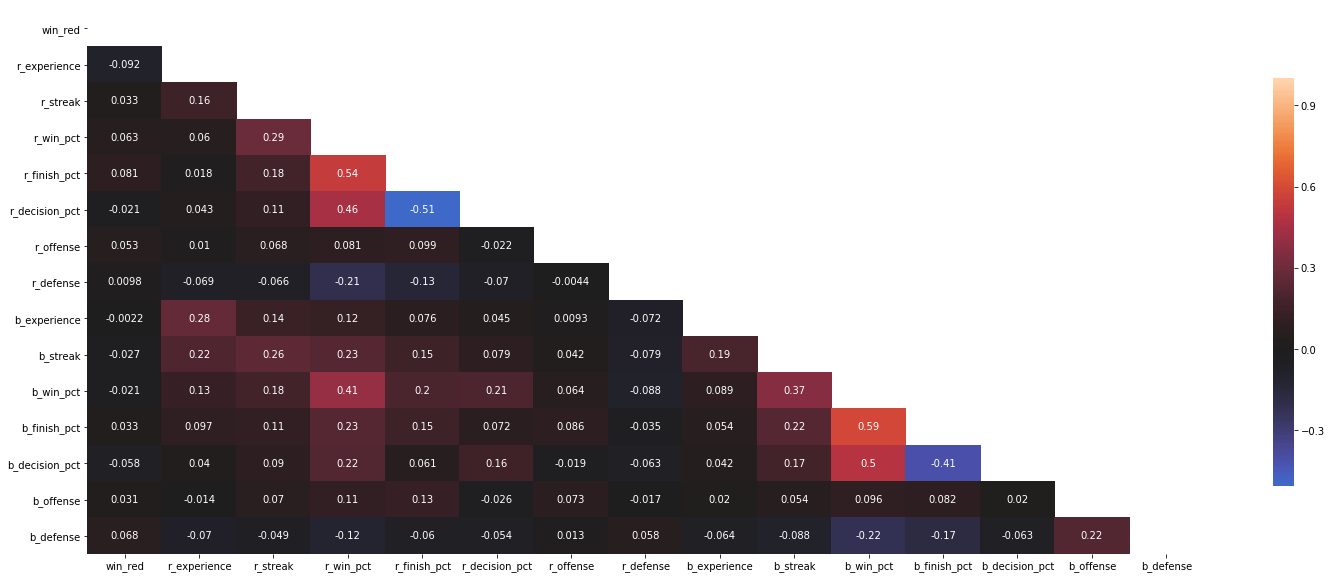

In [29]:
# heatmap correlation key variables
corr = df_keys.corr()

# generate mask for upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,10))
sns.heatmap(corr, mask=mask, annot=True, cbar_kws={"shrink": .75}, center=0)

plt.show()

#### Observations 
- Surprisingly, none of the variables seem to be linearly correlated with the target variable winner. This does not mean we can rule out non-linear correlation at the moment.
- Some variables are correlated with each other. Most notably, win % and finish %. This makes sense since if a fighter has a higher finish % it almost guarantees a relatively high win %. It is probably not common to see a fighter with a high win % and a very low finish %. The UFC greatly values the entertainment factor when putting on shows, not just the caliber of fighters. A fighter with a high win % but always goes to decision typically gets cut from the promotion. It is not enough to win fights; one is also required to be entertaining as well.  

- Problem comparing continuous variables to a binary outcome?

In [ ]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_keys[[#'r_phys_adv',
             'r_experience',  
             'r_win_pct',
             'r_finish_pct',
             'r_offense',
             'r_defense',
             #'b_phys_adv',
             'b_experience',
             'b_win_pct',
             'b_finish_pct',
             'b_offense',
             'b_defense'
             ]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=5)
pca_1 = sklearn_pca.fit_transform(X)

print('The percentage of total variance in the dataset explained by each component.\n',
        sklearn_pca.explained_variance_ratio_)

In [ ]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_keys[[#'r_phys_adv',
             'r_experience',  
             'r_finish_pct',
             #'r_offense',
             #'r_defense',
             #'b_phys_adv',
             'b_experience',
             'b_finish_pct',
             #'b_offense',
             #'b_defense'
             ]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=4)
pca_1 = sklearn_pca.fit_transform(X)

print('The percentage of total variance in the dataset explained by each component.\n',
      sklearn_pca.explained_variance_ratio_)

--------------------------

# Supervised Learning  
1. Define and preprocess data
2. Support vector machines
3. Naive Bayes
4. Logistic regression
5. Decision tree/random forest

In [30]:
# import libraries
import scipy
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.tsa.stattools import acf

In [31]:
# define and preprocess data before modeling

# target variable
Y = df_keys.winner

# feature variables
X = df_keys[[#'r_phys_adv',
             'r_experience',  
             'r_win_pct',
             'r_finish_pct',
             'r_offense',
             'r_defense',
             #'b_phys_adv',
             'b_experience',
             'b_win_pct',
             'b_finish_pct',
             'b_offense',
             'b_defense'
             ]]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# define standard scaler
sc = StandardScaler()

# fit standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Why Support Vector Machines  
- High accuracy
- Ability to find solutions even if non-linearly separable
- Good for high-dimensional space (lots of features)

In [32]:
# support vector machines

# fit model
model = svm.SVC()
results = model.fit(X_train, y_train)

# predict
y_preds = results.predict(X_test)

# print results
print('Train Set Observations: {}'.format(X_train.shape[0]))
print('Test Set Observations:  {}'.format(X_test.shape[0]))
print('')
print('')
print('Support Vector Machine Accuracy Score')
print('')
print('Train Set: ', accuracy_score(y_train, model.predict(X_train)))
print('Test Set: ', accuracy_score(y_test, model.predict(X_test)))

Train Set Observations: 2484
Test Set Observations:  622


Support Vector Machine Accuracy Score

Train Set:  0.643719806763285
Test Set:  0.6784565916398714


#### Observations
- Train and test set are similar at 64% and 68%, which means the model does not seem to be overfitting.
- Not a particularly high accuracy score, but so far it performs better than the baseline strategy of always choosing the red corner win (64% accuracy).

### Why Naive Bayes
- Simple and easy to interpret
- Computationally fast
- Good for high-dimensional space (lots of features)

In [34]:
# naive bayes

# fit to model
model = GaussianNB()
model.fit(X_train, y_train)

# print results
print('Naive Bayes Accuracy Score')
print('')
print('Train Set: ', accuracy_score(y_train, model.predict(X_train)))
print('Test Set: ', accuracy_score(y_test, model.predict(X_test)))

Naive Bayes Accuracy Score

Train Set:  0.44524959742351045
Test Set:  0.4292604501607717


#### Observations
- Train and test set accuracy scores are similar, but 43% is a terrible score. You could achieve far better results by simply choosing the red corner to win every fight (64% accuracy).
- Naive Bayes may not be the best option here.

### Why Logistic Regression  
- Quick to compute and can be updated easily with new data
- Output can be interpreted as probability; this can be used for ranking
- Regularization techniques can be used to prevent overfitting

In [35]:
# logistic regression

# fit model
model = LogisticRegression()
model.fit(X_train, y_train)

print('Logistic Regression Accuracy Score')
print('')
print('Train Set: ', accuracy_score(y_train, model.predict(X_train)))
print('Test Set: ', accuracy_score(y_test, model.predict(X_test)))

Logistic Regression Accuracy Score

Train Set:  0.6276167471819646
Test Set:  0.680064308681672


#### Observations
- Test set accuracy increased by 5% over the train set. 
- Logistic regression and support vector machine have performed the best so far at 68%, beating our baseline score of 64% accuracy.

### Why Decision Tree and Random Forest
- A single decision tree is fast to train
- Robust to noise and missing values
- Random Forest performs very well “out-of-the-box”

In [36]:
# decision tree
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# fit models
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# print results
print('Decision Tree Accuracy Score')
print('')
print('Train Set: ', accuracy_score(y_train, tree_model.predict(X_train)))
print('Test Set: ', accuracy_score(y_test, tree_model.predict(X_test)))
print('')
print('')
print('Random Forest Accuracy Score')
print('')
print('Train Set: ', accuracy_score(y_train, rf_model.predict(X_train)))
print('Test Set: ', accuracy_score(y_test, rf_model.predict(X_test)))

Decision Tree Accuracy Score

Train Set:  0.9903381642512077
Test Set:  0.5691318327974276


Random Forest Accuracy Score

Train Set:  0.9786634460547504
Test Set:  0.5578778135048231


#### Observations
- Accuracy for both decision tree and random forest train set were very high at 99% and 98%, respectively. This suggests the model could be overfitting. It performs well on the known training data, but severely underperforms on the new test set.
- Accuracy for both test sets fell dramatically to 56% and 59%. 
- What could be causing this gap?

# Summary and Conclusion  

After loading the two datasets, we discovered that there were many overlapping variables, and we needed some from each. After joining both datasets, duplicate variables were dropped, which left a clean new set to work with. New variables were then created and combined. Finally, a subset dataframe of key variables was created for modeling. 

Next came exploratory data analysis. Right off the bat we discovered that the red corner wins on average 64% of the time. We chose this as our baseline prediction score to beat. Some other interesting facts arose throughout this phase of the process:  
- Total fight count is dominated by just four weight classes: featherweight(145 lbs), lightweight(155 lbs), welterweight(170 lbs), and middleweight(185 lbs), and account for 60% of all fights.
- Mean fighter age is 30 years old, which was a bit surprising to learn for me. Most people think of fighting as a young man's game. This result appears to refute that statement.
- No single variable was found to be highly linearly correlated with the target variable. This was very surprising to find out. Professional fighting is a volatile sport. if red consistently wins greater than 50% there has to be some combination of features that puts them at 64% win rate.

Our goal of this project was to predict the outcome of UFC fights using supervised learning. Four models were used: support vector machines, naive Bayes, logistic regression, and decision tree/random forest. Both naive Bayes and decision tree/random forest scored terribly and far below the baseline-to-beat of 64% accuracy. Support vector machines and logistic regression scored roughly euqal to 64% on their train sets but scored on the test set with 68% accuracy. 

A score of 68% beats our initial baseline accuracy score of 64%. A small success but a success nonetheless. I believe this score could be improved by implementing the following strategy:  
1. Further refining or combining of features with a focus on win/finish %, height/reach advantage, and fighting style (striker, wrestler, grappler, etc.)
2. Deeper exploratory data analysis to discover not-so-obvious correlations and connections
3. Further model parameter tuning  

Professional fighting is a very volatile sport. Even a champion on a winning streak can lose from a split second minor mistake. Fighters commonly perform injured, severely impairing their potential while highlighting their opponent who may not deserve it. Even with unlimited amounts of data, it is entirely possible that predicting fights is a fool's errand.  

# Acknowledgments
- Rajeev Warrier and his Kaggle dataset (https://www.kaggle.com/rajeevw/ufcdata)
- Shubhabrata Roy (Thinkful mentor)
- Stacey Ronaghan for this gem of an article on machine learning (https://medium.com/@srnghn/machine-learning-trying-to-predict-a-categorical-outcome-6ba542b854f5)
- Any of you who let me know about an error or typo in any of the above (for real, it would be appreciated)

In [ ]:
# neural network

# fit model
model = MLPClassifier()
model.fit(X_train, y_train)

# print results
print('Neural Network Accuracy Score')
print('')
print('Train Set: ', accuracy_score(y_train, model.predict(X_train)))
print('Test Set: ', accuracy_score(y_test, model.predict(X_test)))